[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


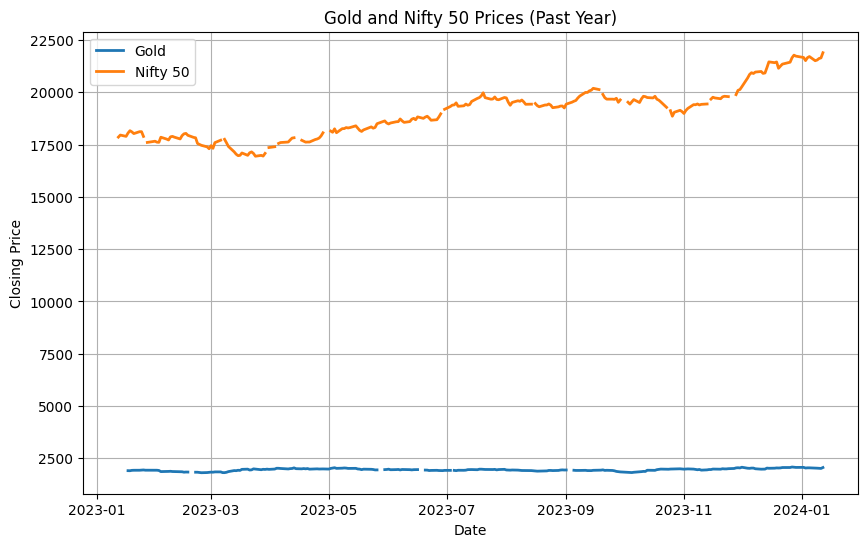

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Close']

# Set the time range for the past year
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=1)

# Collect data for Gold (using the symbol 'GC=F' for gold futures on Yahoo Finance)
gold_symbol = 'GC=F'
gold_prices = get_stock_data(gold_symbol, start_date, end_date)

# Collect data for Nifty 50 (using the symbol '^NSEI' for Nifty 50 index on Yahoo Finance)
nifty_symbol = '^NSEI'
nifty_prices = get_stock_data(nifty_symbol, start_date, end_date)

# Combine the data into a single DataFrame
stock_data = pd.DataFrame({'Gold': gold_prices, 'Nifty50': nifty_prices})

# Reset index to move the date from index to a column
stock_data.reset_index(inplace=True)

# Save the data to a CSV file
csv_filename = 'stock_data.csv'
stock_data.to_csv(csv_filename, index=False)  # Set index=False to exclude the index column

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Gold'], label='Gold', linewidth=2)
plt.plot(stock_data['Date'], stock_data['Nifty50'], label='Nifty 50', linewidth=2)

# Customize the plot
plt.title('Gold and Nifty 50 Prices (Past Year)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()
